### Aluno: Gustavo Silveira Dias
### Curso: Bacharelado em Engenharia de Computação
### Disciplina: Processamento Digital de Imagens


In [81]:
import numpy as np
from scipy import ndimage as ndi
from skimage import util, filters
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Carregando minha imagem

In [82]:
# Carregando a imagem
Imagem = plt.imread('aranha.jpg')

# Convertendo a imagem em uma matriz NumPy
Matriz = np.array(Imagem)

print(Matriz.shape)  # (Altura, Largura, Canais)

(1200, 1600, 3)


In [83]:
Val = np.array(8)

probabilidade = [0.3, 0.1, 0.05, 0.05, 0.05, 0.05, 0.1, 0.3]

Imagem2 = np.random.choice(Val, size=Matriz.shape, p=probabilidade)
print(Imagem2)

[[[5 3 6]
  [0 0 7]
  [2 0 0]
  ...
  [2 0 2]
  [1 0 7]
  [6 7 0]]

 [[7 4 0]
  [7 0 1]
  [0 0 0]
  ...
  [4 6 2]
  [0 3 0]
  [0 7 7]]

 [[0 7 7]
  [1 4 7]
  [5 4 7]
  ...
  [3 6 0]
  [3 7 0]
  [1 0 2]]

 ...

 [[0 5 7]
  [7 0 7]
  [1 1 6]
  ...
  [0 7 0]
  [5 0 7]
  [0 1 0]]

 [[0 7 1]
  [7 6 0]
  [6 7 7]
  ...
  [0 3 0]
  [7 1 7]
  [4 1 0]]

 [[1 1 0]
  [1 7 6]
  [7 0 3]
  ...
  [0 2 6]
  [0 6 3]
  [3 2 1]]]


### Exibindo minha imagem original

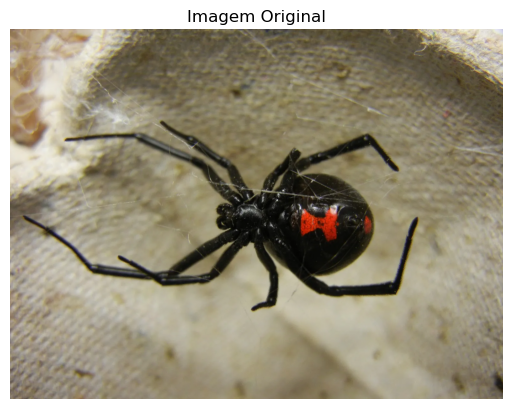

In [84]:
plt.imshow(Matriz, cmap='gray', vmin=0, vmax=8)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

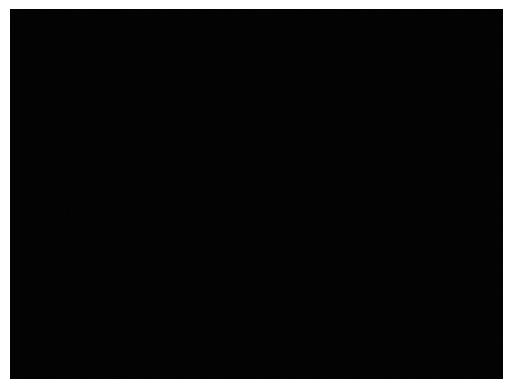

In [85]:
plt.imshow(Imagem2, cmap='gray',vmin=0, vmax=7)
plt.axis('off')
plt.show()

### Implementação do Filtro 3x3

In [86]:
# Implementação do Filtro 3x3
def max_filter_rgb(image_array):
    h, w, c = image_array.shape
    resultado = np.zeros_like(image_array)

    for canal in range(c):
        canal_atual = image_array[:, :, canal]
        # Pad para bordas
        pad = np.pad(canal_atual, pad_width=1, mode='edge')

        # Aplica o máximo na vizinhança 3x3
        vizinhos = []
        for dy in range(3):
            for dx in range(3):
                vizinhos.append(pad[dy:dy+h, dx:dx+w])

        # Empilha os vizinhos e pega o máximo
        stack = np.stack(vizinhos, axis=0)
        resultado[:, :, canal] = np.max(stack, axis=0)

    return resultado


### Aplicando o filtro e reconstruindo a imagem

In [87]:
# Célula 4
matriz_filtrada = max_filter_rgb(Matriz)

# Converte de volta para objeto PIL
img_filtrada = Image.fromarray(matriz_filtrada)


### Comparar imagem original a imagem filtrada

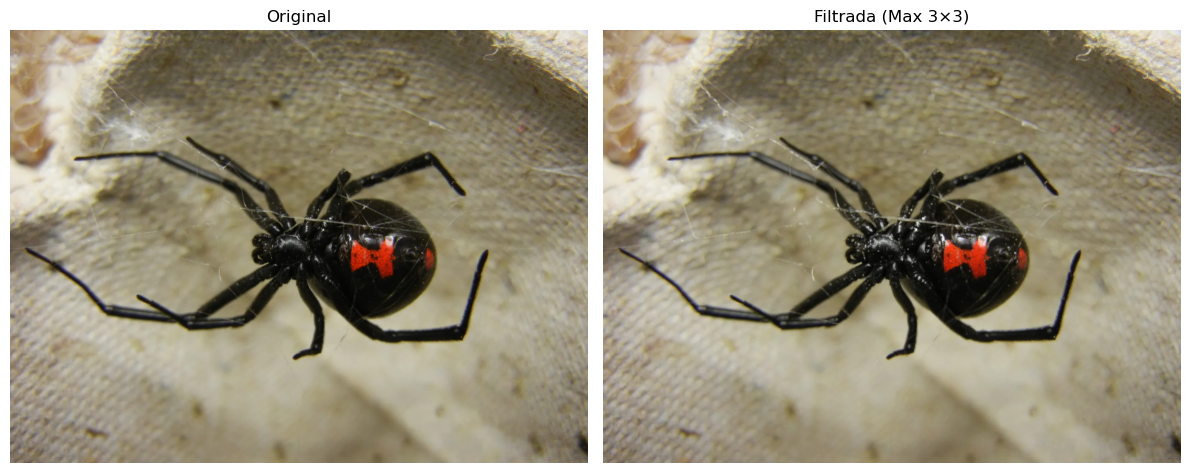

In [88]:
# Célula 5
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(Matriz)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(matriz_filtrada)
plt.title("Filtrada (Max 3×3)")
plt.axis('off')

plt.tight_layout()
plt.show()


### Mostrando que obteve alguma diferença entre as imagem

In [89]:

dif = np.abs(Matriz.astype(int) - matriz_filtrada.astype(int))
print(np.max(dif))  # mostra a maior diferença entre pixels
print(np.sum(dif))  # soma total das diferenças


208
19816849
